In [1]:
#! pip install wordcloud
#! pip install stemming
from stemming.porter2 import stem
import nltk
import  pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize
import string
from nltk.corpus import stopwords 
from wordcloud import WordCloud


# Import Character Data Including Family Data
df = pd.read_json("characters.json")
char_df = pd.DataFrame(columns = ['Name','House'])
houses = []

#Generate Dataframe with Characters and family Data
for index, row in df.iterrows():
    att = list(row["characters"].keys())
    if 'houseName' in att:
        if type(row['characters']['houseName']) is not list:
            h = [row['characters']['houseName']]
        else:
            h = row['characters']['houseName']
        char_df = char_df.append({"Name":row['characters']['characterName'].lower(),"House":h},ignore_index=True)
        if type(row['characters']['houseName']) is not list:
            if row['characters']['houseName'] not in houses:
                houses.append(row['characters']['houseName'])

#Import Script Dataset

script_df = pd.read_csv("Game_of_Thrones_Script.csv", encoding = 'utf-8', header = 0)

# Join Script and Character Dataframes
final_df = pd.merge(script_df,char_df, on=['Name'],how='inner')
final_df.head()



,Release Date,Season,Episode,Episode Title,Name,Sentence,House
0,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,"[Stark, Targaryen]"
1,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,"[Stark, Targaryen]"
2,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.","[Stark, Targaryen]"
3,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Don't look away.,"[Stark, Targaryen]"
4,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Father will know if you do.,"[Stark, Targaryen]"


In [2]:
# Pre-process Final Dataframe by Tokenization and Stemming
# Separate Script Words based on the Houses

house_script = {}
houses.remove("Umber")
houses.remove("Tarly")
for house in houses:
    
    mask = final_df.House.apply(lambda x: house in x)
    filt = final_df[mask]
    script_clean = filt.drop(columns=['Release Date','Episode','Episode Title'])
    script_clean['tokenized'] = script_clean['Sentence'].apply(word_tokenize)
    script_clean['lower_no_stopword'] = script_clean['tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha() and word.lower() not in stopwords.words('english')])
    script_clean['lower'] = script_clean['tokenized'].apply(lambda x: [word.lower() for word in x if word.isalpha()])
    script_clean['porter'] = script_clean['lower_no_stopword'].apply(lambda x: [stem(word) for word in x])
    house_words = script_clean.loc[:, ['porter']]
    house_word_list = house_words.values.tolist()
    house_script[house] = []
    for item in house_word_list:
        for i in item[0]:
            house_script[house].append(i)
    print("House:",house," -> Data Processed.")
print("===============Data Processing Complete====================")
    


House: Targaryen  -> Data Processed.
House: Greyjoy  -> Data Processed.
House: Lannister  -> Data Processed.
House: Stark  -> Data Processed.
House: Baratheon  -> Data Processed.
House: Frey  -> Data Processed.
House: Tully  -> Data Processed.
House: Martell  -> Data Processed.
House: Mormont  -> Data Processed.
House: Tyrell  -> Data Processed.
House: Bolton  -> Data Processed.
===============Data Processing Complete====================


----------------------------------------------------------------------------
House: Targaryen
Total Words: 11591
  1   1.29% know
  2   2.33% want
  3   3.24% men
  4   4.00% go
  5   4.76% one
  6   5.49% take
  7   6.19% come
  8   6.87% need
  9   7.52% king
 10   8.17% us
 11   8.82% back
 12   9.45% would
 13  10.05% kill
 14  10.65% fight
 15  11.23% father
 16  11.82% ca
 17  12.38% think
 18  12.94% man
 19  13.50% like
 20  14.06% peopl
 21  14.61% dragon
 22  15.16% lord


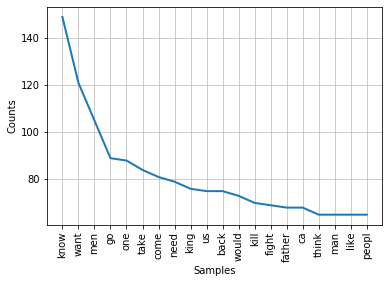

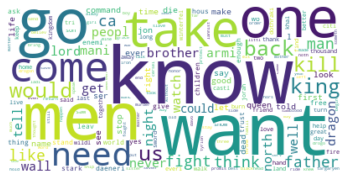

----------------------------------------------------------------------------
House: Greyjoy
Total Words: 3708
  1   1.48% go
  2   2.67% know
  3   3.75% iron
  4   4.77% want
  5   5.77% father
  6   6.72% one
  7   7.66% lord
  8   8.60% theon
  9   9.52% take
 10  10.38% kill
 11  11.22% island
 12  12.06% would
 13  12.89% pleas
 14  13.70% come
 15  14.51% like
 16  15.29% us


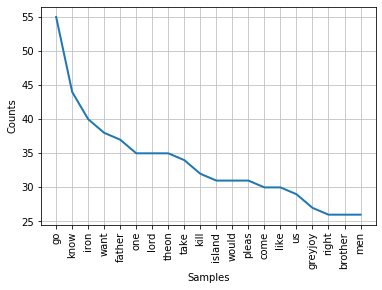

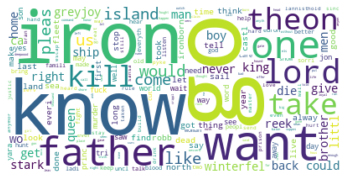

----------------------------------------------------------------------------
House: Lannister
Total Words: 26290
  1   0.94% king
  2   1.88% know
  3   2.79% one
  4   3.70% want
  5   4.55% would
  6   5.29% father
  7   6.01% like
  8   6.63% go
  9   7.21% good
 10   7.78% think
 11   8.33% us
 12   8.86% man
 13   9.37% kill
 14   9.87% come
 15  10.38% stark
 16  10.86% time
 17  11.35% could
 18  11.83% well
 19  12.31% see
 20  12.75% make
 21  13.19% need
 22  13.62% men
 23  14.05% right
 24  14.48% lord
 25  14.90% get
 26  15.33% take


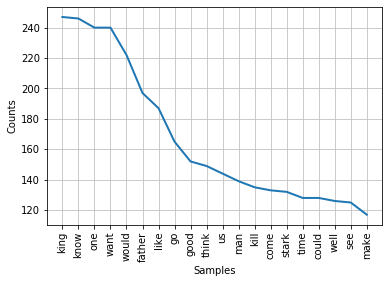

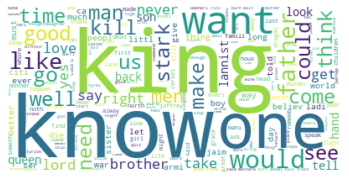

----------------------------------------------------------------------------
House: Stark
Total Words: 18109
  1   1.46% know
  2   2.65% want
  3   3.80% go
  4   4.95% lord
  5   5.90% king
  6   6.81% father
  7   7.68% would
  8   8.52% one
  9   9.33% come
 10  10.06% us
 11  10.76% kill
 12  11.44% never
 13  12.09% back
 14  12.70% ca
 15  13.30% like
 16  13.89% get
 17  14.48% men
 18  15.05% need


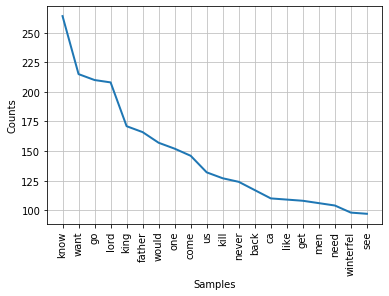

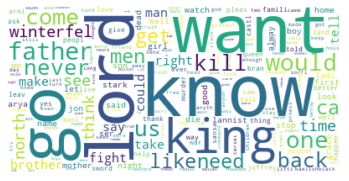

----------------------------------------------------------------------------
House: Baratheon
Total Words: 9576
  1   1.17% king
  2   2.14% want
  3   3.10% know
  4   4.02% one
  5   4.79% father
  6   5.52% would
  7   6.24% like
  8   6.90% brother
  9   7.55% us
 10   8.15% good
 11   8.72% make
 12   9.28% love
 13   9.83% come
 14  10.37% man
 15  10.90% take
 16  11.43% think
 17  11.95% stark
 18  12.46% could
 19  12.96% littl
 20  13.46% need
 21  13.96% son
 22  14.45% go
 23  14.92% men
 24  15.39% time


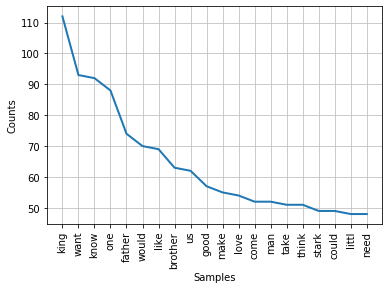

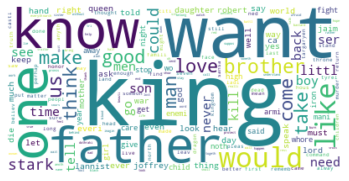

----------------------------------------------------------------------------
House: Frey
Total Words: 271
  1   5.17% l
  2   7.01% lord
  3   8.86% tulli
  4  10.70% stark
  5  12.18% boy
  6  13.65% come
  7  15.13% dead


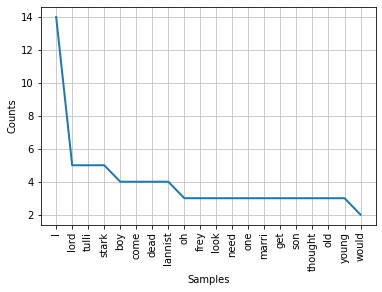

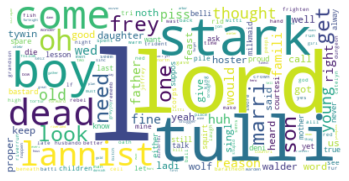

----------------------------------------------------------------------------
House: Tully
Total Words: 1675
  1   1.91% lord
  2   3.46% son
  3   4.84% king
  4   6.09% want
  5   7.34% would
  6   8.36% know
  7   9.37% father
  8  10.33% time
  9  11.28% one
 10  12.18% take
 11  12.96% come
 12  13.73% lannist
 13  14.45% god
 14  15.16% promis


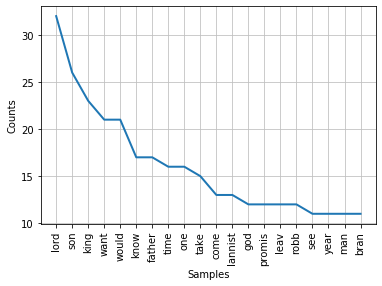

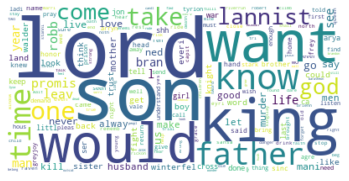

----------------------------------------------------------------------------
House: Martell
Total Words: 870
  1   1.49% sister
  2   2.99% say
  3   4.37% like
  4   5.75% kill
  5   7.01% lannist
  6   8.28% children
  7   9.43% would
  8  10.57% rape
  9  11.61% elia
 10  12.64% murder
 11  13.56% one
 12  14.48% girl
 13  15.40% know


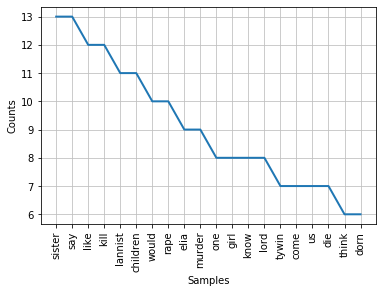

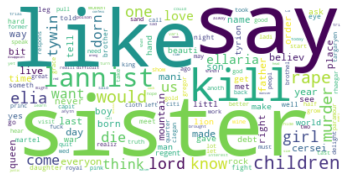

----------------------------------------------------------------------------
House: Mormont
Total Words: 2303
  1   1.74% khaleesi
  2   2.87% men
  3   3.86% know
  4   4.82% l
  5   5.73% want
  6   6.64% man
  7   7.43% need
  8   8.21% queen
  9   8.94% one
 10   9.64% right
 11  10.33% citi
 12  11.03% dragon
 13  11.68% sword
 14  12.33% kill
 15  12.98% us
 16  13.63% take
 17  14.29% would
 18  14.89% good
 19  15.50% think


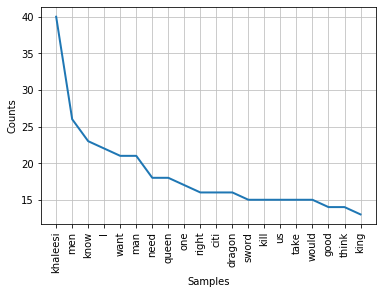

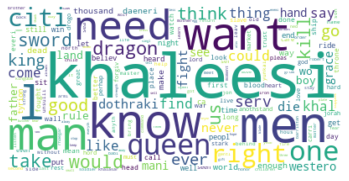

----------------------------------------------------------------------------
House: Tyrell
Total Words: 2964
  1   1.25% know
  2   2.36% king
  3   3.44% want
  4   4.52% would
  5   5.43% us
  6   6.31% brother
  7   7.12% go
  8   7.89% never
  9   8.64% good
 10   9.38% need
 11  10.12% love
 12  10.86% grace
 13  11.61% like
 14  12.35% queen
 15  13.02% father
 16  13.66% lora
 17  14.30% come
 18  14.91% one
 19  15.49% let


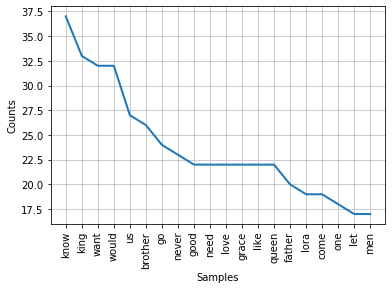

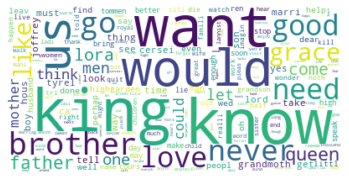

----------------------------------------------------------------------------
House: Bolton
Total Words: 302
  1   1.66% well
  2   2.98% grace
  3   4.30% winterfel
  4   5.63% would
  5   6.95% king
  6   8.28% father
  7   9.60% robb
  8  10.60% lannist
  9  11.59% take
 10  12.58% enough
 11  13.58% tywin
 12  14.57% men
 13  15.56% ladi


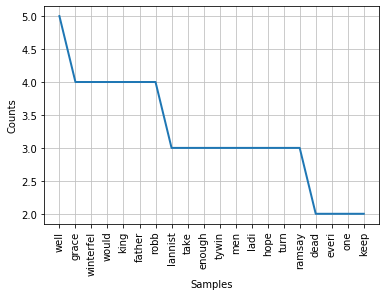

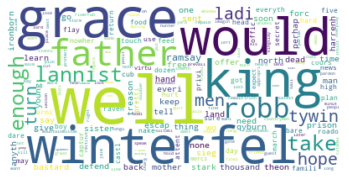

In [3]:
# Conduct Wordcount analysis and generate visualizations

for key,value in house_script.items():
    print("----------------------------------------------------------------------------")
    print("House:", key)
    print("Total Words:",len(value))
    house_fd = nltk.FreqDist(value)
    house_most_common_words = [word for (word, count) in house_fd.most_common()]
    filter_words = dict([(m, n) for m, n in house_fd.items()])
    cumulative = 0.0
    for rank, word in enumerate(house_most_common_words):
        cumulative += house_fd.freq(word)
        print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
        if cumulative > 0.15: 
            break
    house_fd.plot(20, cumulative=False)
    
    wcloud = WordCloud(background_color='white').generate_from_frequencies(filter_words)
 
    # Plotting the wordcloud
    plt.imshow(wcloud, interpolation="bilinear")
 
    plt.axis("off")
    (-0.5, 399.5, 199.5, -0.5)
    plt.show()